# **Data Preprocessing**

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('spam.tsv', sep='\t')

In [109]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [110]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [111]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [112]:
(df['label'].value_counts()/len(df))*100
#so this data set is not labeled 

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

In [113]:
df[df['label'] =='ham']

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [114]:
ham=df[df['label'] =='ham']

In [115]:
spam=df[df['label'] =='spam']

In [116]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [117]:
ham=ham.sample(spam.shape[0])

In [118]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [119]:
print(type(ham))
print(type(spam))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [120]:
data=pd.concat([ham, spam], ignore_index=True)

In [121]:
data.shape

(1494, 4)

In [122]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [123]:
data.head()

,label,message,length,punct
0,ham,Yun buying... But school got offer 2000 plus o...,52,6
1,ham,when you and derek done with class?,35,1
2,ham,"As usual..iam fine, happy &amp; doing well..:)",46,9
3,ham,Ok.,3,1
4,ham,Da is good good player.why he is unsold.,40,2


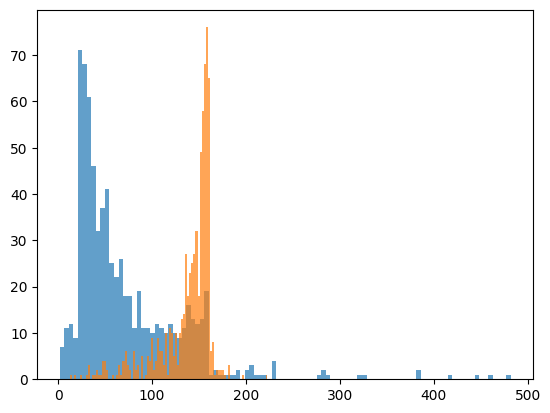

In [124]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

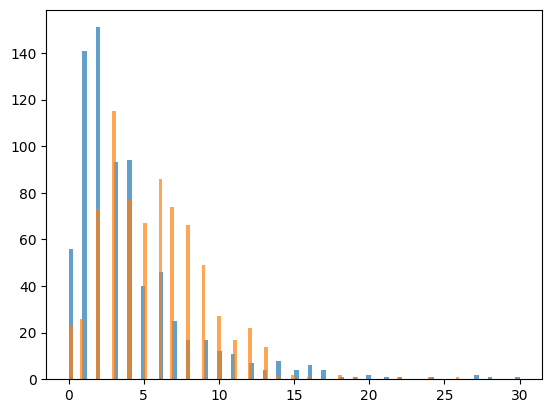

In [125]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [126]:
data

,label,message,length,punct
0,ham,Yun buying... But school got offer 2000 plus o...,52,6
1,ham,when you and derek done with class?,35,1
2,ham,"As usual..iam fine, happy &amp; doing well..:)",46,9
3,ham,Ok.,3,1
4,ham,Da is good good player.why he is unsold.,40,2
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [129]:
x_train.shape,x_test.shape

((1045,), (449,))

# **Building The Model (Random Forest)** 

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [131]:
classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=10))])

In [132]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

### **Predicting the Result** 

In [133]:
y_pred=classifier.predict(x_test)

In [134]:
y_test,y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 

In [144]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [145]:
accuracy_score(y_test,y_pred)

0.9175946547884187

In [146]:
confusion_matrix(y_test,y_pred)

array([[221,   6],
       [ 31, 191]], dtype=int64)

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.88      0.97      0.92       227
        spam       0.97      0.86      0.91       222

    accuracy                           0.92       449
   macro avg       0.92      0.92      0.92       449
weighted avg       0.92      0.92      0.92       449



# **Building Another Model (Support Vector Model)** 

In [150]:
from sklearn.svm import SVC

In [151]:
svc=Pipeline([('tfidf',TfidfVectorizer()),('classifier',SVC(C=100,gamma='auto'))])

In [152]:
svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

### **Predicting the Result** 

In [153]:
y_pred=svm.predict(x_test)

In [154]:
confusion_matrix(y_test,y_pred)

array([[224,   3],
       [ 15, 207]], dtype=int64)

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.96       227
        spam       0.99      0.93      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# **Testing Data On Both Model** 

In [157]:
test1 = ['Hello, You are Learning Natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [158]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [159]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
